# Limits of Diversification

### including the anatomy of a cap-weighted portfolio, and a bunch of cool pandas stuff along the way

In [2]:
%load_ext autoreload
%autoreload 2

import edhec_risk_kit as erk
import pandas as pd
import numpy as np

In [3]:
ind_return = erk.get_ind_returns()
ind_size = erk.get_ind_size()
ind_nfirms = erk.get_ind_nfirms()

c:\Users\shantala.mukherjee\OneDrive - Invartis Consulting\Python\edhec_risk_kit.py:83: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ind = pd.read_csv("ind30_m_rets.csv",
c:\Users\shantala.mukherjee\OneDrive - Invartis Consulting\Python\edhec_risk_kit.py:59: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ind = pd.read_csv("ind30_m_size.csv",
c:\Users\shantala.mukherjee\OneDrive - Invartis Consulting\Python\edhec_risk_kit.py:71: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ind = pd.read_csv("ind30_m_nfirms.csv",


In [4]:
ind_return.shape

(1173, 30)

In [5]:
ind_size.shape

(1173, 30)

In [6]:
ind_nfirms.shape

(1173, 30)

We will construct a market-cap index from these industry sectors.

In [7]:
ind_mktcap = ind_nfirms * ind_size #mkt cap of each of these industry portfolios over time
ind_mktcap.shape

(1173, 30)

In [8]:
# total market cap
total_mktcap = ind_mktcap.sum(axis="columns") # sum of each row across all the columns

<Axes: >

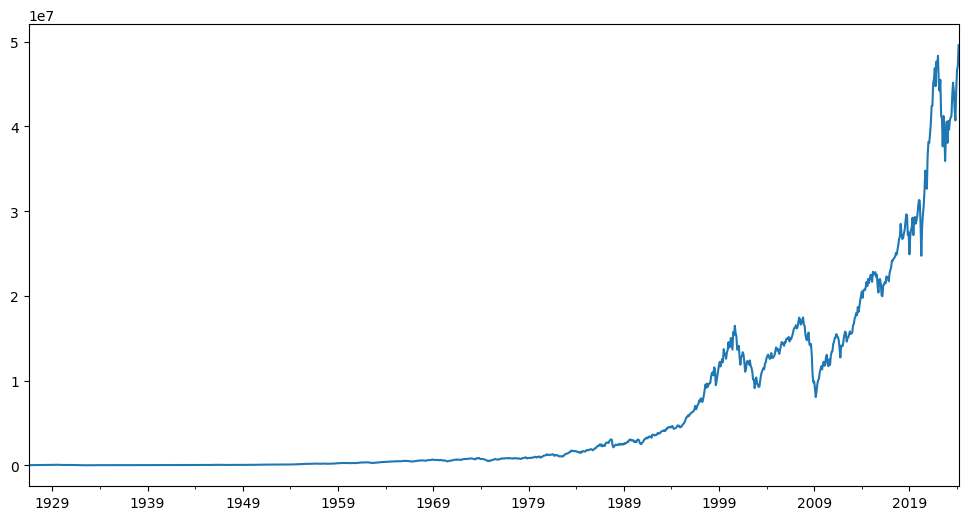

In [11]:
total_mktcap.plot(figsize=(12,6))

In [12]:
# to obtain the mkt cap weights of each industry in this portfolio:
ind_capweight = ind_mktcap.divide(total_mktcap, axis="rows") #divide the entries in each row by the corresponding total mkt cap for that row
ind_capweight.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.057945,0.000800,0.035787,0.006924,0.000900,0.006673,0.008252,0.006691,0.036668,0.003031,...,0.065610,0.001528,0.014865,0.007944,0.186685,0.000089,0.057657,0.002431,0.008779,0.003633
1926-08,0.056494,0.000737,0.035212,0.006922,0.000970,0.006443,0.008660,0.006573,0.038440,0.002950,...,0.064284,0.001610,0.014710,0.008267,0.184299,0.000066,0.055931,0.002402,0.008521,0.003714
1926-09,0.056616,0.000916,0.036457,0.006800,0.001044,0.006030,0.008237,0.006658,0.039642,0.003114,...,0.064225,0.001607,0.014849,0.007862,0.188184,0.000068,0.054148,0.002336,0.008683,0.003873
1926-10,0.056836,0.000952,0.036682,0.007165,0.001026,0.006044,0.008127,0.006694,0.041425,0.003169,...,0.064800,0.001634,0.014828,0.007425,0.187749,0.000063,0.054200,0.002306,0.008517,0.003724
1926-11,0.056641,0.000949,0.038228,0.007036,0.001159,0.005915,0.008384,0.006820,0.040605,0.003279,...,0.066769,0.001640,0.015095,0.007225,0.188031,0.000054,0.054554,0.002275,0.008295,0.003516


In [14]:
# check that the sum of the weights equals 1
ind_capweight.loc["1926"].sum(axis="columns")

1926-07    1.0
1926-08    1.0
1926-09    1.0
1926-10    1.0
1926-11    1.0
1926-12    1.0
Freq: M, dtype: float64

<Axes: >

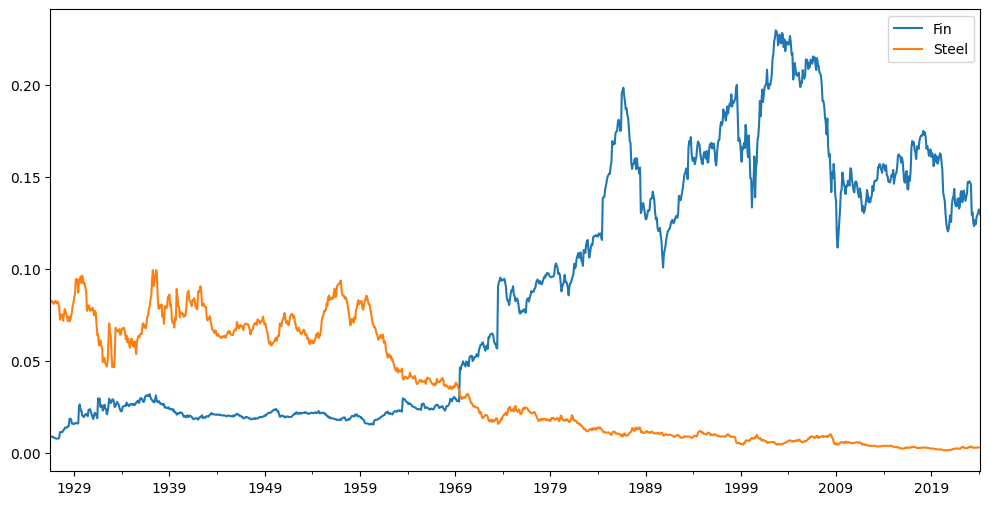

In [15]:
ind_capweight[["Fin", "Steel"]].plot(figsize=(12,6))

In [16]:
# now we can calculate the return series for the market weighted index constructed from these 30 industries
total_market_return = (ind_capweight * ind_return).sum(axis="columns")

<Axes: >

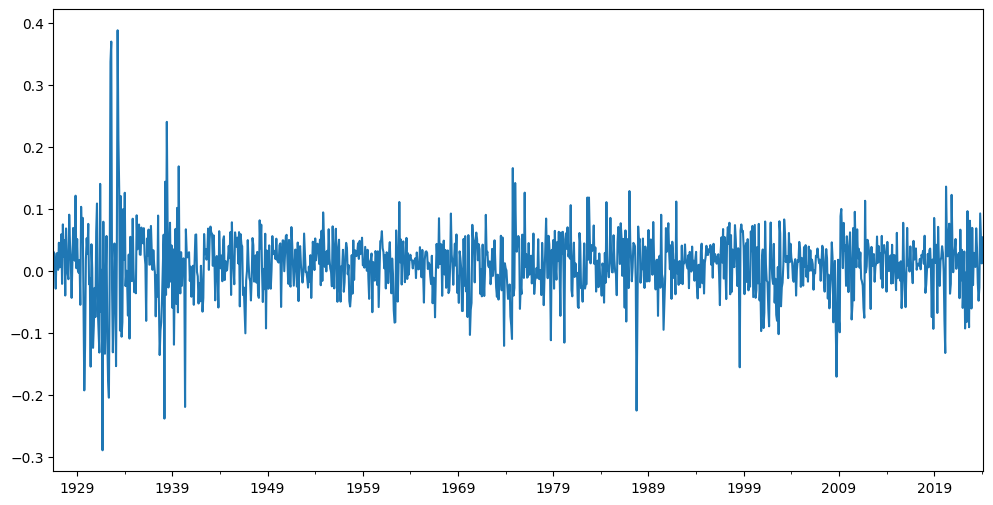

In [17]:
total_market_return.plot(figsize=(12,6))

<Axes: title={'center': 'Total Market Cap Weighted Index 1926 - 2024'}>

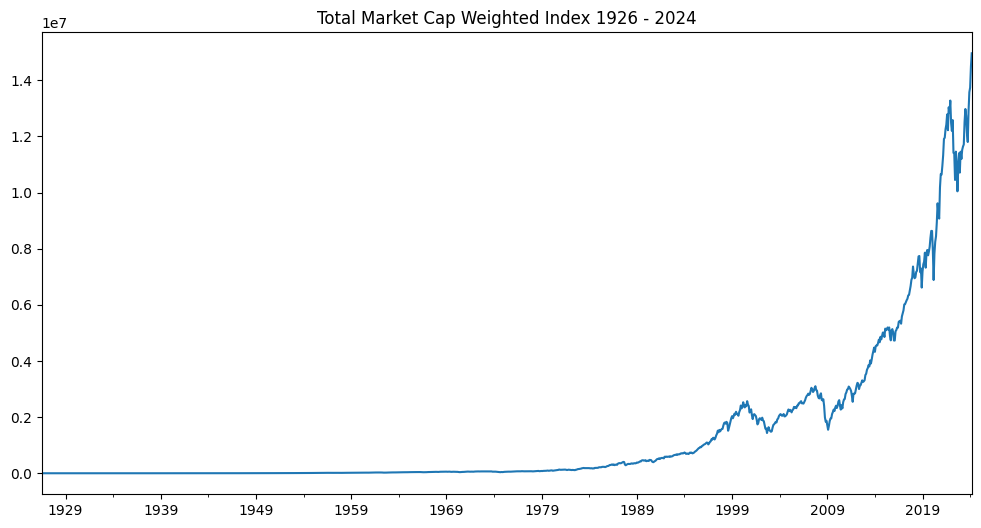

In [18]:
total_market_index = erk.drawdown(total_market_return).Wealth
total_market_index.plot(figsize=(12,6), title="Total Market Cap Weighted Index 1926 - 2024")

<Axes: >

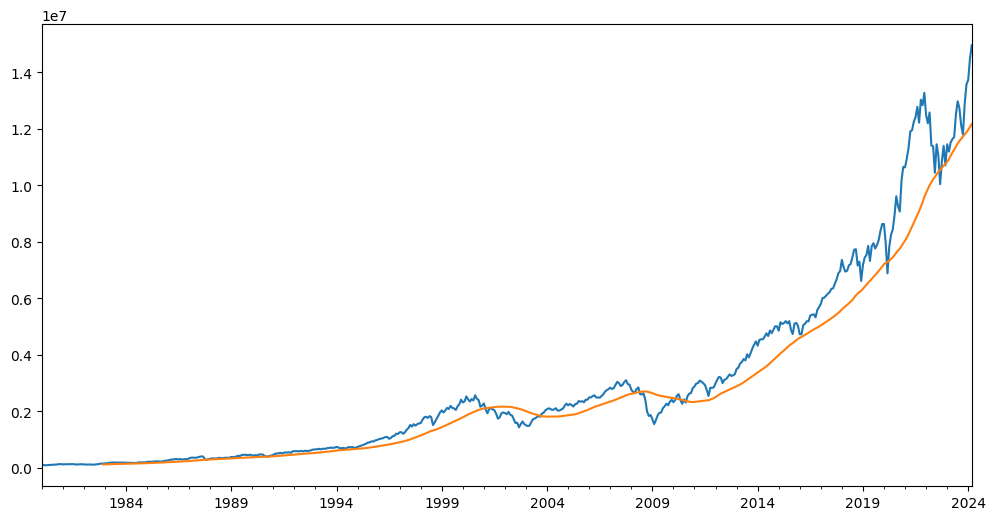

In [19]:
# next we will plot the index and the rolling 3 year index -- matplotlib will put both of them in the same plot
total_market_index.loc["1980":].plot(figsize=(12,6))
total_market_index.loc["1980":].rolling(window=36).mean().plot(figsize=(12,6)) # computes the mean return over rolling 36 month windows from 1980 onwards -- rolling function works if the index is datetime

<Axes: >

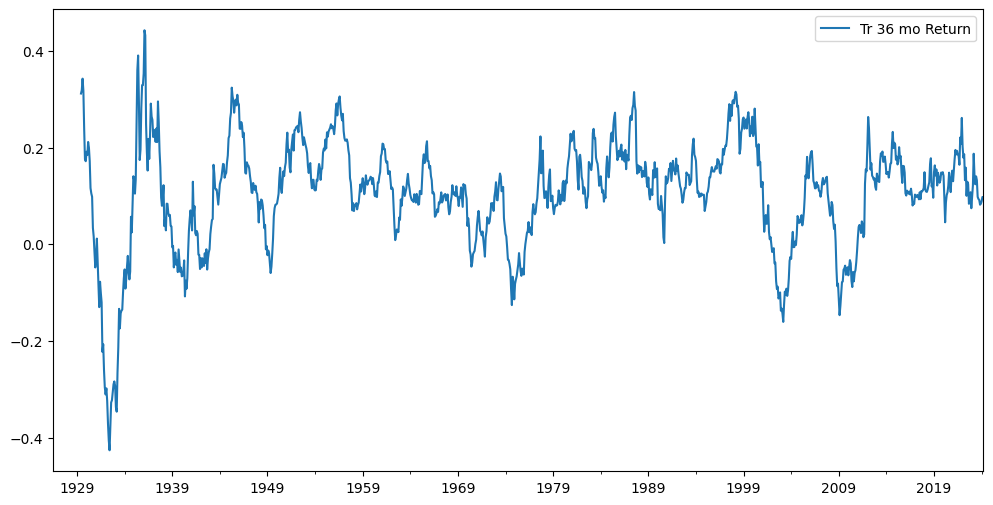

In [24]:
# returns of the trailing 36 month periods
tmi_tr36rets = total_market_return.rolling(window=36).aggregate(erk.annualize_rets, periods_per_year=12)
tmi_tr36rets.plot(figsize=(12,6), label="Tr 36 mo Return", legend=True)
#total_market_return.plot(figsize=(12,6), label="Returns", legend=True)

### Rolling Correlations, along with Multi Indexes and '.groupby' in Pandas

In [25]:
# Generate the time series of correlations between the industries
ts_corr = ind_return.rolling(36).corr()
ts_corr.tail() # generates a time series of correlation matrices


Food      Beer     Smoke     Games     Books     Hshld  \
2024-03 Whlsl  0.708309  0.672480  0.593767  0.706135  0.744366  0.683681   
        Rtail  0.332616  0.373036  0.169700  0.813890  0.751299  0.416168   
        Meals  0.664009  0.640995  0.516698  0.749005  0.770797  0.676324   
        Fin    0.625258  0.542851  0.597055  0.697513  0.761505  0.476669   
        Other  0.694846  0.626337  0.609237  0.668696  0.761795  0.589533   

                  Clths      Hlth     Chems     Txtls  ...     Telcm  \
2024-03 Whlsl  0.708552  0.739914  0.865552  0.750545  ...  0.706385   
        Rtail  0.710025  0.618519  0.661576  0.590173  ...  0.506238   
        Meals  0.762358  0.729921  0.801846  0.752397  ...  0.688984   
        Fin    0.637539  0.634327  0.853020  0.723233  ...  0.739018   
        Other  0.664027  0.733872  0.789682  0.607474  ...  0.655098   

                  Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
2024-03 Whlsl  0.674045  0.763970  0.831326  0.851109  1.000000  0.732923   
        Rtail  0.861384  0.884228  0.644925  0.771567  0.732923  1.000000   
        Meals  0.711218  0.758388  0.781811  0.792852  0.868286  0.783818   
        Fin    0.606589  0.608139  0.818771  0.820416  0.820020  0.637210   
        Other  0.658526  0.702909  0.806724  0.787598  0.856673  0.707802   

                  Meals       Fin     Other  
2024-03 Whlsl  0.868286  0.820020  0.856673  
        Rtail  0.783818  0.637210  0.707802  
        Meals  1.000000  0.776114  0.780997  
        Fin    0.776114  1.000000  0.806488  
        Other  0.780997  0.806488  1.000000  

[5 rows x 30 columns]

The above output is a matrix with a multi (two) index -- datetime and industry

In [26]:
ts_corr.index.names #check if the indices have any names at present -- result will show none

FrozenList([None, None])

In [27]:
# we will assign names to the multi index
ts_corr.index.names = ["date", "industry"]
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
date    industry                                                               
2024-03 Whlsl     0.708309  0.672480  0.593767  0.706135  0.744366  0.683681   
        Rtail     0.332616  0.373036  0.169700  0.813890  0.751299  0.416168   
        Meals     0.664009  0.640995  0.516698  0.749005  0.770797  0.676324   
        Fin       0.625258  0.542851  0.597055  0.697513  0.761505  0.476669   
        Other     0.694846  0.626337  0.609237  0.668696  0.761795  0.589533   

                     Clths      Hlth     Chems     Txtls  ...     Telcm  \
date    industry                                          ...             
2024-03 Whlsl     0.708552  0.739914  0.865552  0.750545  ...  0.706385   
        Rtail     0.710025  0.618519  0.661576  0.590173  ...  0.506238   
        Meals     0.762358  0.729921  0.801846  0.752397  ...  0.688984   
        Fin       0.637539  0.634327  0.853020  0.723233  ...  0.739018   
        Other     0.664027  0.733872  0.789682  0.607474  ...  0.655098   

                     Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
date    industry                                                               
2024-03 Whlsl     0.674045  0.763970  0.831326  0.851109  1.000000  0.732923   
        Rtail     0.861384  0.884228  0.644925  0.771567  0.732923  1.000000   
        Meals     0.711218  0.758388  0.781811  0.792852  0.868286  0.783818   
        Fin       0.606589  0.608139  0.818771  0.820416  0.820020  0.637210   
        Other     0.658526  0.702909  0.806724  0.787598  0.856673  0.707802   

                     Meals       Fin     Other  
date    industry                                
2024-03 Whlsl     0.868286  0.820020  0.856673  
        Rtail     0.783818  0.637210  0.707802  
        Meals     1.000000  0.776114  0.780997  
        Fin       0.776114  1.000000  0.806488  
        Other     0.780997  0.806488  1.000000  

[5 rows x 30 columns]

In [28]:
ind_tr36corr = ts_corr.groupby(level="date").apply(lambda cormat: cormat.values.mean()) # average correlation across industries

<Axes: xlabel='date'>

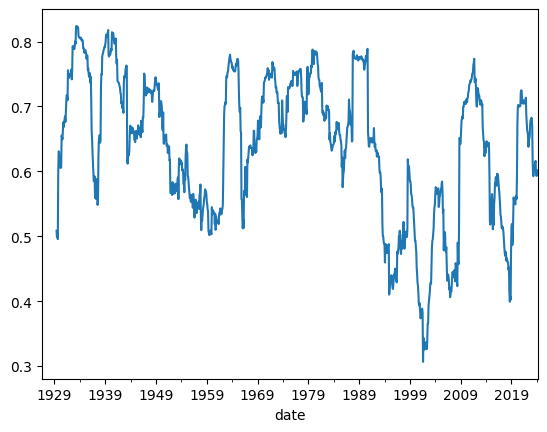

In [29]:
ind_tr36corr.plot()

<Axes: >

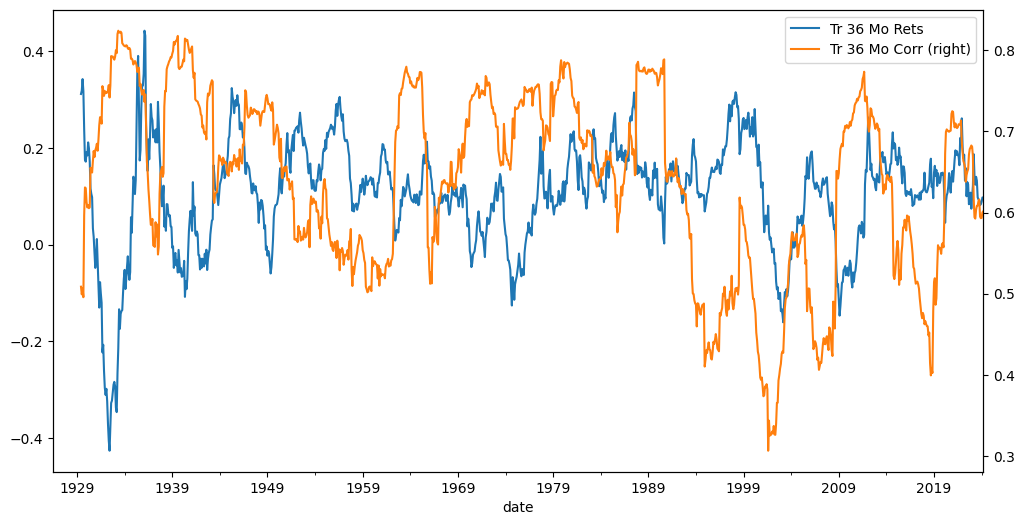

In [31]:
tmi_tr36rets.plot(label="Tr 36 Mo Rets", figsize=(12,6), legend=True)
ind_tr36corr.plot(label="Tr 36 Mo Corr", legend=True, secondary_y=True)

The above shows how diversication can fail just when you need it most -- during periods of bear markets, correlations between industry returns rise

<Axes: >

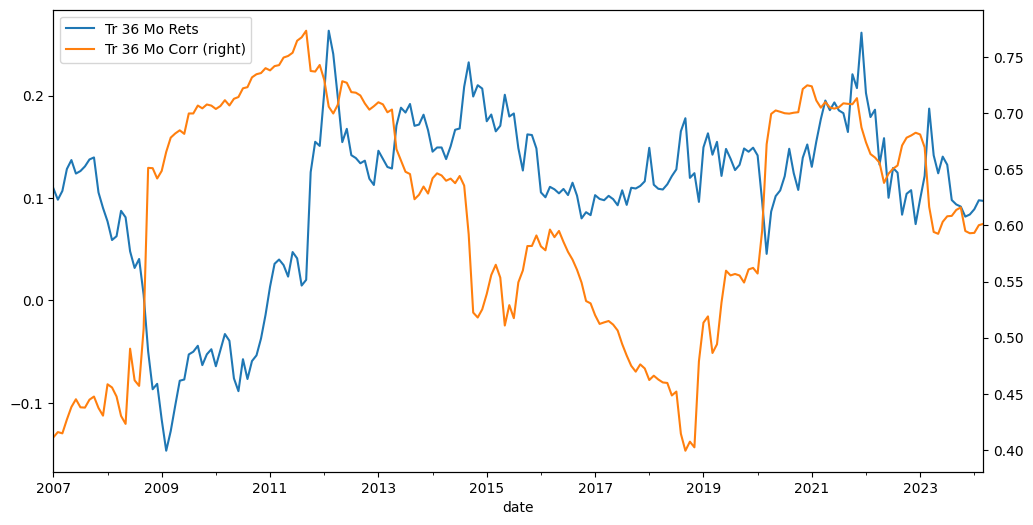

In [32]:
tmi_tr36rets.loc["2007":].plot(label="Tr 36 Mo Rets", figsize=(12,6), legend=True)
ind_tr36corr.loc["2007":].plot(label="Tr 36 Mo Corr", legend=True, secondary_y=True)

In [33]:
tmi_tr36rets.corr(ind_tr36corr) # correlation between the total market returns and the avg correlations of the industries

-0.27491026850547495